# A Simple NMF (Nonnegative Matrix Factorization) Application Example
## Decomposing the Introductions of: 
## Bruce Springsteen - Streets of Philadelphia

## Short Intuition about NMF
The main idea of matrix decomposition is to represent a matrix as a product of other matrices.
In general terms, the NMF technique factorizes a matrix V with nonnegative values into two matrices W and H with also nonnegative values $ V \approx W \cdot H $.




In [2]:
# Import Python Packages
import numpy as np, scipy, matplotlib.pyplot as plt, librosa, IPython.display, librosa.display

#Other Configurations
%matplotlib notebook
#jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000  - Open jupyter notebook setting iopub_data_rate

After importing the Python Packages we are going to use, and set some configurations for the notebook, let's import the .wav audio file for Bruce Springsteen - Streets of Philadelphia

In [3]:
# Importing audio file
filename = 'Bruce Springsteen - Streets Of Philadelphia.wav'
x, fs = librosa.load(filename)

In [4]:
# Playback audio file
IPython.display.Audio(x, rate=fs)

Once the audio file is loaded, let's grab some information about the audio data.

In [5]:
# Audio data information
print("x Shape=", x.shape)
print("Sample rate fs=", fs)
print("Audio Lenght in seconds=%d [s]" % (x.shape[0]/fs))

x Shape= (154350,)
Sample rate fs= 22050
Audio Lenght in seconds=7 [s]


Let's visualize the audio waveform, and detect the onsets.

In [6]:
# Detect Onset Frames
onset_frames = librosa.onset.onset_detect(x, sr=fs)
# Get Onset Times
onset_times = librosa.frames_to_time(onset_frames)

<IPython.core.display.Javascript object>


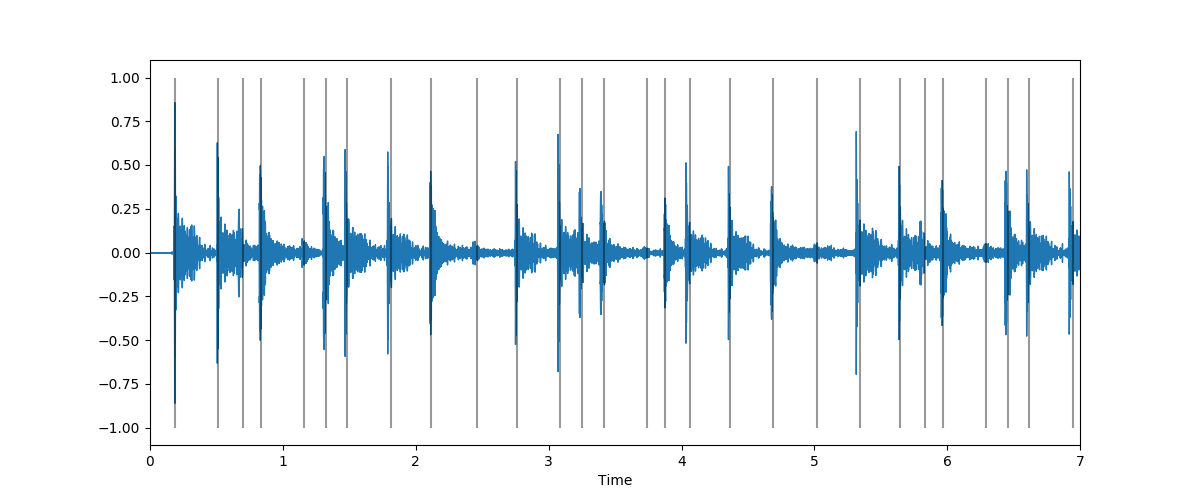

In [7]:
# Plot Onset on Top of Waveform
plt.figure(figsize=(12, 5))
librosa.display.waveplot(x, sr=fs)
plt.vlines(onset_times, -1,1, color='k', alpha=0.4);

Now we calculate the STFT of the audio data, and plot the log of its absolute value. Then we have some onset detection and plot the onsets lines on top of our graph.

X Shape (1025, 302)


<IPython.core.display.Javascript object>


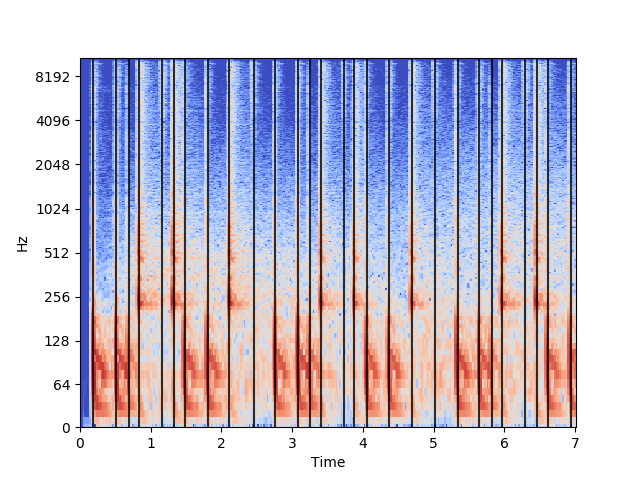

In [8]:
# STFT
S = librosa.stft(x)
X = np.absolute(S)
print("X Shape",X.shape)
import librosa.display
logS = librosa.core.amplitude_to_db(np.abs(S))
plt.figure()
librosa.display.specshow(logS, sr=fs, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, fs/2, color='k', alpha=0.8);

At this point we have a good idea of how our signal looks like in time and frequency. We can see two main frequency regions, a low frequency that should be the kick drum, and a frequency above 250 Hz that should be the snare drum. 

Let's move on to a NMF decomposition using 2 components.

In [9]:
# NMF Decomposition
n_components = 2
W, H = librosa.decompose.decompose(X, n_components=n_components, sort=True)
print('W shape=',W.shape)
print('H shape=',H.shape)


W shape= (1025, 2)
H shape= (2, 302)


We can visualize the W components.

<IPython.core.display.Javascript object>


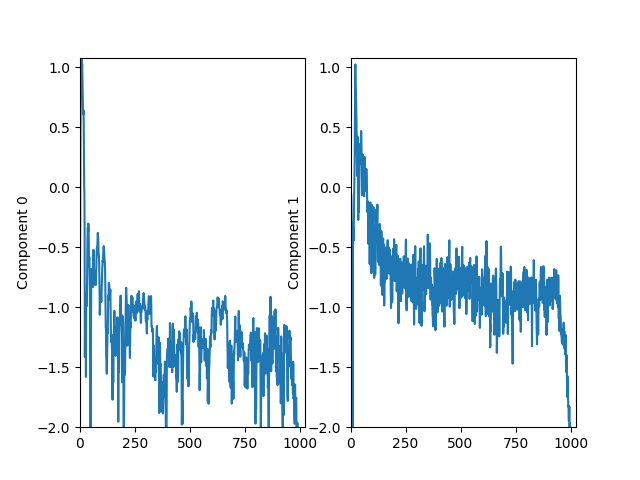

In [10]:
# Plotting W Components
plt.figure()
W[W<np.finfo(float).eps]=np.finfo(float).eps
logW = np.log10(W)
for n in range(n_components):
    plt.subplot(np.ceil(n_components/2.0), 2, n+1)
    plt.plot(logW[:,n])
    plt.ylim(-2, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)

And we can also visualize the H activations.

<IPython.core.display.Javascript object>


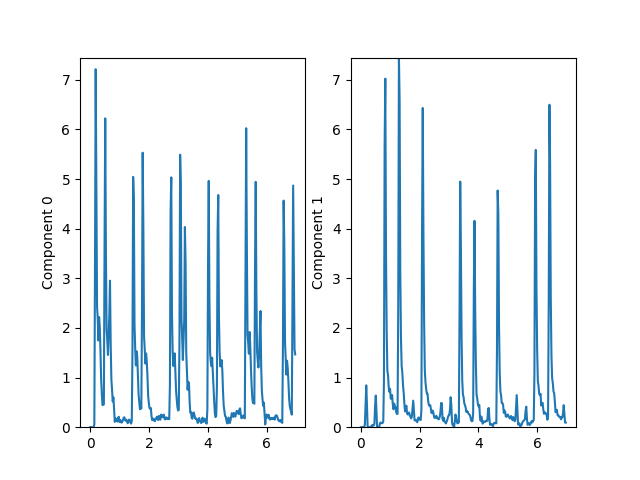

In [11]:
# Plotting H activations
plt.figure()
t=np.arange(H.shape[1])*((x.shape[0]/fs)/H.shape[1])
for n in range(n_components):
    plt.subplot(np.ceil(n_components/2.0), 2, n+1)
    plt.plot(t,H[n])
    plt.ylim(0, H.max())
    #plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)

Now, we can listen to the decomposed audio signals.

In [12]:
# Playback decomposed signals
reconstructed_signal = scipy.zeros(len(x))
for n in range(n_components):
    print('Component ',n)
    Y = scipy.outer(W[:,n], H[n])*np.exp(1j*np.angle(S))
    y = librosa.istft(Y)
    reconstructed_signal[:len(y)] += y
    IPython.display.display( IPython.display.Audio(y, rate=fs) )
print("Reconstructed Signal")
IPython.display.display( IPython.display.Audio(reconstructed_signal, rate=fs) )

Component  0


Component  1


Reconstructed Signal


# Conclusions
 Streets of Philadelphia introduction consists of a drums sequence  with a kick drum, a snare drum, a hi-hat and some background ambience. NMF component 0 consists most of the kick drum, and component 1 has most of the snare drum. 
 


